In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
import os
import import_ipynb
os.chdir(os.getcwd()+'\\Modules')
from time_shifted_PID import PIfunc
%matplotlib inline

importing Jupyter notebook from time_shifted_PID.ipynb


In [18]:
n=30
Syn_l = np.zeros((n,n)) 
Rdn_l = np.zeros((n,n)) 
Ux_l = np.zeros((n,n)) 
Uy_l = np.zeros((n,n)) 
o = np.random.randint(n, size=30000)+1
for i in range(n):
    for j in range(n):
        x = o + np.random.randint(i+1, size=30000)
        y = o + np.random.randint(j+1, size=30000)
#         x[x>np.mean(x)] = 0
#         y = x.copy()
#         x = np.random.poisson(x)
#         y = np.random.poisson(y)
        z = np.random.poisson(o)
        timeshift, Information = PIfunc(z, x, y, 1, [-0,0], 'BROJA')
        Syn_l[i,j] = Information[('BROJA_2PID','CI')].copy()
        Rdn_l[i,j] = Information[('BROJA_2PID','SI')].copy()
        Ux_l[i,j] = Information[('BROJA_2PID','UIx')].copy()
        Uy_l[i,j] = Information[('BROJA_2PID','UIv')].copy()

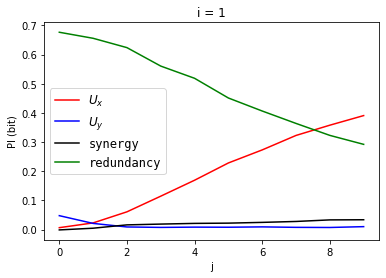

In [19]:
ind = 1
plt.plot(Ux_l[ind,:],'r')
plt.plot(Uy_l[ind,:],'b')
plt.plot(Syn_l[ind,:],'k')
plt.plot(Rdn_l[ind,:],'g')
plt.xlabel('j')
plt.ylabel('PI (bit)')
plt.title('i = '+str(ind))
plt.legend( (r'$U_x$', r'$U_y$', 'synergy', 'redundancy'), loc='best', prop={'size': 'large', 'family': 'monospace'})

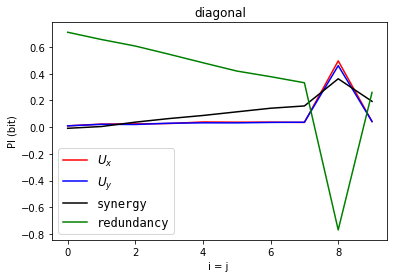

In [20]:
plt.title('diagonal')
plt.plot(Ux_l.diagonal(),'r')
plt.plot(Uy_l.diagonal(),'b')
plt.plot(Syn_l.diagonal(),'k')
plt.plot(Rdn_l.diagonal(),'g')
plt.xlabel('i = j ')
plt.ylabel('PI (bit)')
plt.legend( (r'$U_x$', r'$U_y$', 'synergy', 'redundancy'), loc='best', prop={'size': 'large', 'family': 'monospace'})

Text(0, 0.5, 'PI (bit)')

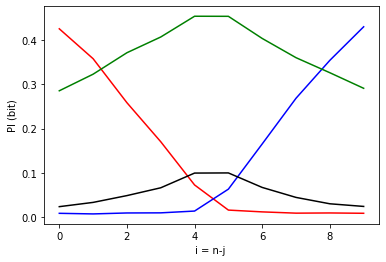

In [21]:
plt.plot(np.fliplr(Ux_l).diagonal(),'r')
plt.plot(np.fliplr(Uy_l).diagonal(),'b')
plt.plot(np.fliplr(Syn_l).diagonal(),'k')
plt.plot(np.fliplr(Rdn_l).diagonal(),'g')
plt.xlabel('i = n-j ')
plt.ylabel('PI (bit)')
# plt.legend( (r'$U_x$', r'$U_y$', 'synergy', 'redundancy'), loc='best')

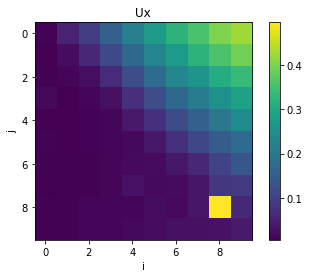

In [22]:
plt.imshow(Ux_l)
plt.xlabel('i')
plt.ylabel('j')
plt.title('Ux')
plt.colorbar()

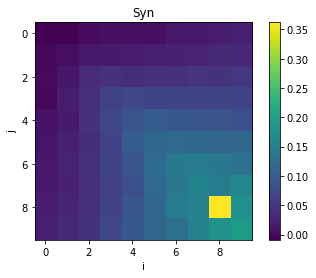

In [23]:
plt.imshow(Syn_l)
plt.xlabel('i')
plt.ylabel('j')
plt.title('Syn')
plt.colorbar()

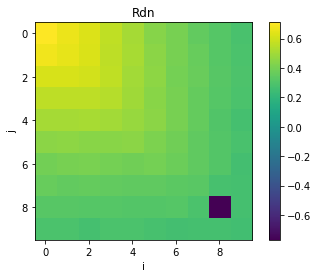

In [24]:
plt.imshow(Rdn_l)
plt.xlabel('i')
plt.ylabel('j')
plt.title('Rdn')
plt.colorbar()

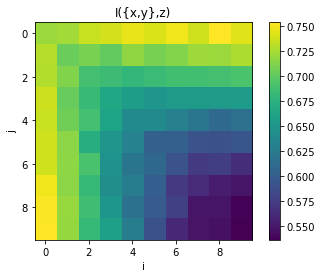

In [25]:
plt.imshow(Ux_l+Rdn_l+Uy_l+Syn_l)
plt.xlabel('i')
plt.ylabel('j')
plt.title('I({x,y},z)')
plt.colorbar()